## Group S - NSW Crime Report
### Theft - Aidan Van Klaveren

Create a copy of this page and use it as a template. 
The data has already been prepared for you, so just import as below. 
One data set is crimeDS, it is crime data with population, employment and income data for 2016. 
The other is a time series data from 1995 to 2018 with just crime figures for each local government area (no employment, income data etc). 

Each member will create their own notebook which will be combined at the end to create
the project. You are welcome to change the datasets in memory however you need, but please dont write any changes to the files. You will also create your video presentation on your own notebook. 

We will each be allocated 2 offences, but it will probably be enough to do just one offence. 
They are allocated as follows


- Simon: Drugs, Malicious Damage

- Priya: Assault, Intimidation/stalking and harassment

- Aidan: Theft, Sexual offences

- Breegid: Robbery, Arson

### Tips

- Be sure to cover just basic data exploration as outlined earlier in the course,  I think this will be the majority of the project. 


- Use descriptive graphs, compare different LGA's for 2016 and then historically. 


- With linear, be specific with categories, fit for each LGA and category. Combining LGA's and offence categories together probably won't give you a good result


- when comparing against different LGA's, use offence_rate for comparison (normalised by population). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

#read data files
crimeRateTS = pd.read_csv("data/crimeRateTS.gzip", compression="gzip")
crimeDS = pd.read_csv("data/crimeDS.gzip", compression="gzip")

In [2]:
crimeDS.head()

,LGA,Offence category,Total,age_median,age_median_female,age_median_male,population,density,code,fertility_rate,...,asia,africa,middle-east,americas,offence_rate,median_income,mean_income,office,professionals,trades
0,Albury,Arson,33,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,6.325353,45382.0,50857.0,24.0,42.9,31.6
1,Albury,Assault,605,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,115.964808,45382.0,50857.0,24.0,42.9,31.6
2,Albury,Drug offences,645,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,123.631903,45382.0,50857.0,24.0,42.9,31.6
3,Albury,"Intimidation, stalking and harassment",315,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,60.378371,45382.0,50857.0,24.0,42.9,31.6
4,Albury,Malicious damage to property,685,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,131.298998,45382.0,50857.0,24.0,42.9,31.6


In [3]:
crimeRateTS.head()

,LGA,Offence category,total,year,Code,population,offence_rate
0,Albury,Arson,79,2013,10050,50338,15.694
1,Albury,Assault,703,2013,10050,50338,139.656
2,Albury,Drug offences,374,2013,10050,50338,74.298
3,Albury,"Intimidation, stalking and harassment",316,2013,10050,50338,62.776
4,Albury,Malicious damage to property,891,2013,10050,50338,177.003


In [4]:
crime_theft = crimeDS
crime_theft = crime_theft[(crime_theft['Offence category'] == 'Theft')]
crime_theft

,LGA,Offence category,Total,age_median,age_median_female,age_median_male,population,density,code,fertility_rate,...,asia,africa,middle-east,americas,offence_rate,median_income,mean_income,office,professionals,trades
7,Albury,Theft,2300,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,440.857948,45382.0,50857.0,24.0,42.9,31.6
15,Armidale Regional,Theft,1849,35.6,36.6,34.6,30313,3.5,10130,1.7,...,4.2,0.7,1.2,0.9,609.969320,39733.0,47386.0,22.1,49.5,27.0
23,Ballina,Theft,1148,47.1,48.2,45.6,42993,88.7,10250,1.8,...,1.5,0.7,0.1,0.8,267.020213,40397.0,48108.0,22.2,47.4,28.7
31,Balranald,Theft,68,40.2,40.4,39.8,2330,0.1,10300,2.9,...,1.8,0.2,0.3,0.4,291.845494,39057.0,42262.0,14.7,40.2,41.9
39,Bathurst Regional,Theft,1766,36.4,38.1,34.8,42244,11.1,10470,1.9,...,2.3,0.4,0.3,0.5,418.047533,47994.0,54554.0,21.8,44.4,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Wingecarribee,Theft,913,46.3,47.3,45.1,48998,18.2,18350,1.8,...,2.4,0.7,0.3,0.9,186.334136,44251.0,56904.0,21.0,45.5,32.0
999,Wollondilly,Theft,665,36.7,37.2,36.1,49854,19.5,18400,1.9,...,1.3,0.5,0.5,0.7,133.389497,52718.0,61156.0,23.3,37.8,37.1
1007,Wollongong,Theft,6518,38.3,39.5,37.0,210394,307.6,18450,1.7,...,4.8,0.7,1.6,1.1,309.799709,50000.0,59856.0,22.6,46.1,29.8
1015,Woollahra,Theft,1255,38.8,39.3,38.3,57744,4703.2,18500,1.4,...,5.8,4.2,1.5,3.2,217.338598,64623.0,114376.0,19.2,71.8,7.0


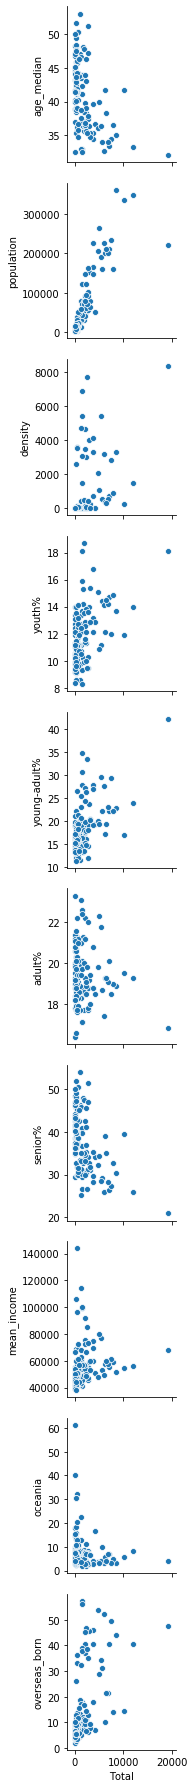

In [5]:
sns.pairplot(data = crime_theft, x_vars = ['Total'], y_vars = ['age_median', 'population', 'density', 'youth%', 'young-adult%', 'adult%', 'senior%', 'mean_income', 'oceania', 'overseas_born'])

The above pairplot shows the correlation between selected variables and the total number of theft cases. The only variable with a strong correlation with total number of theft cases is increase in population. The other scatter plots dont reveal any super strong relationship, but looking at the distribution of the where the points are located we can see some possible reasons. The higher the youth or youth-adult percentage of population, the more cases of theft there tend to be. When average income is lower, the amount of theft cases tends to be higher. Looking at the percentage of oceania born vs overseas born, the higher the perctage of overseas born also tends to have an effect on the total number of theft cases.

In [6]:
theft_top = crime_theft
theft_top = theft_top.groupby(['LGA', 'Offence category']).sum().sort_values('Total', ascending=False)
theft_top.head(5)

,,Total,age_median,age_median_female,age_median_male,population,density,code,fertility_rate,death_rate,children%,...,asia,africa,middle-east,americas,offence_rate,median_income,mean_income,office,professionals,trades
LGA,Offence category,,,,,,,,,,,,,,,,,,,,,
Sydney,Theft,19266,32.1,31.3,32.9,222717,8328.1,17200,1.0,4.8,3.5,...,25.9,1.0,1.4,3.9,865.043980,48852.0,68007.0,18.7,64.9,14.5
Blacktown,Theft,12035,33.3,33.8,32.8,348030,1449.8,10750,2.1,6.0,14.7,...,22.7,1.5,3.7,1.0,345.803523,51696.0,56407.0,25.6,38.5,33.9
Central Coast,Theft,10112,41.8,43.2,40.3,336611,200.2,11650,1.9,6.1,12.7,...,2.6,0.7,0.3,0.9,300.406107,46229.0,54428.0,24.3,42.2,31.9
Canterbury-Bankstown,Theft,8468,35.0,35.8,34.2,361862,3282.6,11570,2.1,5.1,13.1,...,22.8,1.0,9.2,1.0,234.011861,44942.0,51942.0,25.1,39.5,33.0
Newcastle,Theft,7930,36.5,37.7,35.3,160707,860.5,15900,1.6,6.9,11.0,...,4.6,0.8,0.7,0.8,493.444592,49901.0,58859.0,22.3,49.5,26.7


From 2016, the top 5 LGA's were Sydney, Blacktown, Central Coast, Canterbury-Bankstown and Newcastle. These 5 regions will be used for comparison between year and cases.

In [7]:
year_theft_top = crimeRateTS
year_theft_top = year_theft_top[(year_theft_top['Offence category'] == 'Theft')]
year_theft_top = year_theft_top[(year_theft_top['LGA'] ==  'Blacktown') | (year_theft_top['LGA'] ==  'Sydney') |
(year_theft_top['LGA'] ==  'Central Coast') | (year_theft_top['LGA'] ==  'Canterbury-Bankstown') | 
(year_theft_top['LGA'] ==  'Newcastle')]
year_theft_top

,LGA,Offence category,total,year,Code,population,offence_rate
79,Blacktown,Theft,12117,2013,10750,324797,373.064
191,Canterbury-Bankstown,Theft,10559,2013,11570,345692,305.445
207,Central Coast,Theft,9773,2013,11650,327745,298.189
671,Newcastle,Theft,8179,2013,15900,157477,519.377
839,Sydney,Theft,23951,2013,17200,196318,1220.010
1095,Blacktown,Theft,12258,2014,10750,331825,369.412
1207,Canterbury-Bankstown,Theft,9978,2014,11570,350922,284.337
1223,Central Coast,Theft,9204,2014,11650,330377,278.591
1687,Newcastle,Theft,7073,2014,15900,158683,445.731
1855,Sydney,Theft,22316,2014,17200,204516,1091.162


Text(0.5, 1.0, 'Theft cases from year 2013 to 2018')

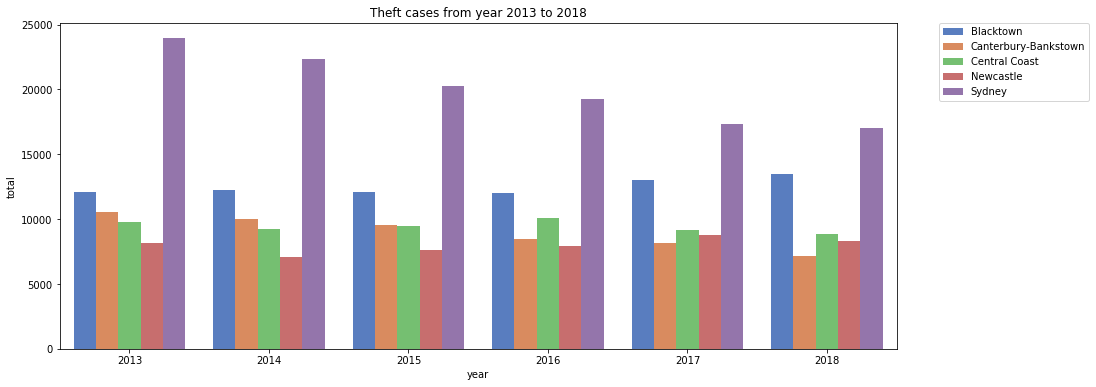

In [8]:
plt.figure(figsize=(15,6)) 
 
sns.barplot(x = 'year',
            y = 'total', 
            data = year_theft_top, 
            hue = 'LGA', 
            palette = 'muted',
            ci = None)
 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Theft cases from year 2013 to 2018')

The theft cases from year 2013 to 2018 bar plot shows the total number of theft cases for the top 5 regions within those year periods. Sydney has retained the largest amount of theft cases over the years but has been on a slight decline. The other four regions have remained pretty consistent.

### Sexual Offences - Aidan Van Klaveren

In [9]:
crime_sex = crimeDS
crime_sex = crime_sex[(crime_sex['Offence category'] == 'Sexual offences')]
crime_sex

,LGA,Offence category,Total,age_median,age_median_female,age_median_male,population,density,code,fertility_rate,...,asia,africa,middle-east,americas,offence_rate,median_income,mean_income,office,professionals,trades
6,Albury,Sexual offences,115,38.3,39.4,37.1,52171,170.5,10050,2.0,...,4.0,0.5,0.2,0.4,22.042897,45382.0,50857.0,24.0,42.9,31.6
14,Armidale Regional,Sexual offences,67,35.6,36.6,34.6,30313,3.5,10130,1.7,...,4.2,0.7,1.2,0.9,22.102728,39733.0,47386.0,22.1,49.5,27.0
22,Ballina,Sexual offences,66,47.1,48.2,45.6,42993,88.7,10250,1.8,...,1.5,0.7,0.1,0.8,15.351336,40397.0,48108.0,22.2,47.4,28.7
30,Balranald,Sexual offences,4,40.2,40.4,39.8,2330,0.1,10300,2.9,...,1.8,0.2,0.3,0.4,17.167382,39057.0,42262.0,14.7,40.2,41.9
38,Bathurst Regional,Sexual offences,85,36.4,38.1,34.8,42244,11.1,10470,1.9,...,2.3,0.4,0.3,0.5,20.121201,47994.0,54554.0,21.8,44.4,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Wingecarribee,Sexual offences,57,46.3,47.3,45.1,48998,18.2,18350,1.8,...,2.4,0.7,0.3,0.9,11.633128,44251.0,56904.0,21.0,45.5,32.0
998,Wollondilly,Sexual offences,90,36.7,37.2,36.1,49854,19.5,18400,1.9,...,1.3,0.5,0.5,0.7,18.052714,52718.0,61156.0,23.3,37.8,37.1
1006,Wollongong,Sexual offences,289,38.3,39.5,37.0,210394,307.6,18450,1.7,...,4.8,0.7,1.6,1.1,13.736133,50000.0,59856.0,22.6,46.1,29.8
1014,Woollahra,Sexual offences,58,38.8,39.3,38.3,57744,4703.2,18500,1.4,...,5.8,4.2,1.5,3.2,10.044334,64623.0,114376.0,19.2,71.8,7.0


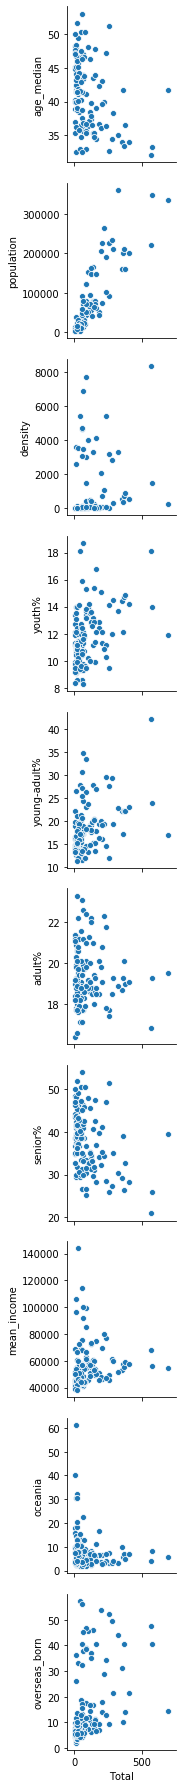

In [10]:
sns.pairplot(data = crime_sex, x_vars = ['Total'], y_vars = ['age_median', 'population', 'density', 'youth%', 'young-adult%', 'adult%', 'senior%', 'mean_income', 'oceania', 'overseas_born'])

Similarly, the pairplot shows total number of sexual assault cases against other variables. The only variable with a strong correlation is population size. From the youth and youth-adult there is more variance between total when their are a high percentage in these two categories which show this variables has some influence on total amount of cases. When these are low there a small variance and consistantly low amount of cases. When the average income is lower there is also more variance in the data and where the high totals are located within. The percentage of overseas born also has an effect on the amount of cases as their is a higher spread within the high percentage region.

In [11]:
sex_top = crime_sex
sex_top = sex_top.groupby(['LGA', 'Offence category']).sum().sort_values('Total', ascending=False)
sex_top.head(5)

,,Total,age_median,age_median_female,age_median_male,population,density,code,fertility_rate,death_rate,children%,...,asia,africa,middle-east,americas,offence_rate,median_income,mean_income,office,professionals,trades
LGA,Offence category,,,,,,,,,,,,,,,,,,,,,
Central Coast,Sexual offences,696,41.8,43.2,40.3,336611,200.2,11650,1.9,6.1,12.7,...,2.6,0.7,0.3,0.9,20.676686,46229.0,54428.0,24.3,42.2,31.9
Blacktown,Sexual offences,576,33.3,33.8,32.8,348030,1449.8,10750,2.1,6.0,14.7,...,22.7,1.5,3.7,1.0,16.550297,51696.0,56407.0,25.6,38.5,33.9
Sydney,Sexual offences,564,32.1,31.3,32.9,222717,8328.1,17200,1.0,4.8,3.5,...,25.9,1.0,1.4,3.9,25.323617,48852.0,68007.0,18.7,64.9,14.5
Penrith,Sexual offences,406,34.0,34.6,33.4,201597,498.1,16350,1.9,6.4,13.7,...,7.1,0.9,1.7,0.8,20.139189,52417.0,57287.0,27.4,35.4,35.3
Newcastle,Sexual offences,372,36.5,37.7,35.3,160707,860.5,15900,1.6,6.9,11.0,...,4.6,0.8,0.7,0.8,23.147716,49901.0,58859.0,22.3,49.5,26.7


From 2016, the top 5 LGA's for sexual assault were the Central Coast, Blacktown, Sydney, Penrith and Newcastle. These 5 regions will be used for comparison between year and cases.

In [12]:
year_sex_top = crimeRateTS
year_sex_top = year_sex_top[(year_sex_top['Offence category'] == 'Sexual offences')]
year_sex_top = year_sex_top[(year_sex_top['LGA'] ==  'Central Coast') | (year_sex_top['LGA'] ==  'Blacktown') |
(year_sex_top['LGA'] ==  'Sydney') | (year_sex_top['LGA'] ==  'Penrith') | 
(year_sex_top['LGA'] ==  'Newcastle')]
year_sex_top

,LGA,Offence category,total,year,Code,population,offence_rate
78,Blacktown,Sexual offences,522,2013,10750,324797,16.072
206,Central Coast,Sexual offences,543,2013,11650,327745,16.568
670,Newcastle,Sexual offences,353,2013,15900,157477,22.416
726,Penrith,Sexual offences,339,2013,16350,190527,17.793
838,Sydney,Sexual offences,525,2013,17200,196318,26.742
1094,Blacktown,Sexual offences,583,2014,10750,331825,17.570
1222,Central Coast,Sexual offences,600,2014,11650,330377,18.161
1686,Newcastle,Sexual offences,333,2014,15900,158683,20.985
1742,Penrith,Sexual offences,386,2014,16350,193765,19.921
1854,Sydney,Sexual offences,515,2014,17200,204516,25.181


Text(0.5, 1.0, 'Sexual Assault cases from year 2013 to 2018')

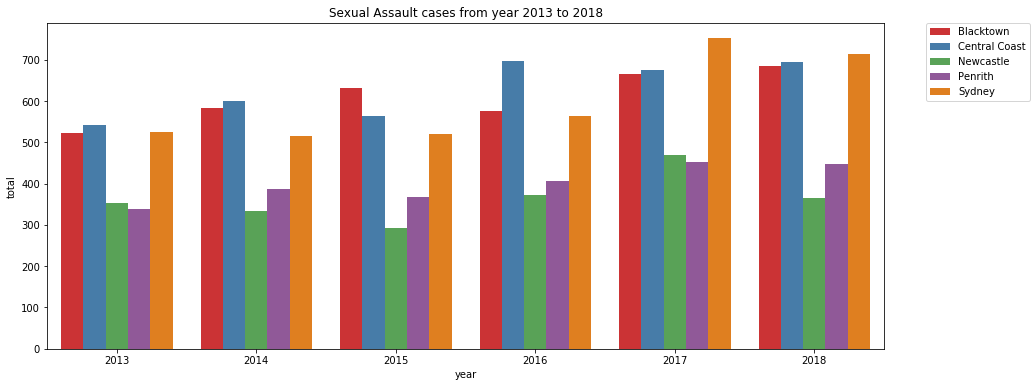

In [13]:
plt.figure(figsize=(15,6)) 
 
sns.barplot(x = 'year',
            y = 'total', 
            data = year_sex_top, 
            hue = 'LGA', 
            palette = 'Set1',
            ci = None)
 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Sexual Assault cases from year 2013 to 2018')

The sexual assualt cases can be seen within the above graph, the Central Coast and Blacktown have consistenly stayed higher than the other regions for most of the years. Sydney cases rose above them for the years 2017 and 2018. Newcastle and Penrith have stayed fairly consistent.

## Linear Regression 
### Theft - Blacktown



In [14]:
blacktown_theft = crimeRateTS[(crimeRateTS['LGA'] == 'Blacktown') & (crimeRateTS['Offence category'] == 'Theft')]
blacktown_theft

,LGA,Offence category,total,year,Code,population,offence_rate
79,Blacktown,Theft,12117,2013,10750,324797,373.064
1095,Blacktown,Theft,12258,2014,10750,331825,369.412
2111,Blacktown,Theft,12106,2015,10750,339449,356.637
3127,Blacktown,Theft,12035,2016,10750,348030,345.804
4143,Blacktown,Theft,12998,2017,10750,357839,363.236
5159,Blacktown,Theft,13444,2018,10750,366534,366.787


In [15]:
yearNumber = []
for x in range (0, 6):
    yearNumber.append(x)
print(yearNumber)

[0, 1, 2, 3, 4, 5]


In [16]:
est = LinearRegression(fit_intercept = True)

x = np.array(yearNumber).reshape(6,1)
y = blacktown_theft.offence_rate

est.fit(x, y)

print ("Coefficients: ", est.coef_)
print ("Intercept: ", est.intercept_)

Coefficients:  [-1.7356]
Intercept:  366.82899999999995


MSE: 73.12
R^2: -7.32


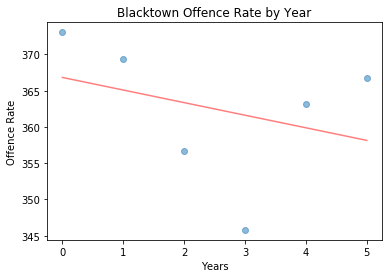

In [17]:
model = LinearRegression()
model.fit(x,y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.title('Blacktown Offence Rate by Year')
plt.xlabel('Years')
plt.ylabel('Offence Rate')
print ("MSE:", mean_squared_error(y_hat, y).round(2))
print ("R^2:", r2_score(y_hat, y).round(2))

### Theft - Sydney

In [18]:
sydney_theft = crimeRateTS[(crimeRateTS['LGA'] == 'Sydney') & (crimeRateTS['Offence category'] == 'Theft')]
sydney_theft

,LGA,Offence category,total,year,Code,population,offence_rate
839,Sydney,Theft,23951,2013,17200,196318,1220.010
1855,Sydney,Theft,22316,2014,17200,204516,1091.162
2871,Sydney,Theft,20252,2015,17200,214037,946.192
3887,Sydney,Theft,19266,2016,17200,222717,865.044
4903,Sydney,Theft,17357,2017,17200,233177,744.370
5919,Sydney,Theft,17044,2018,17200,240229,709.490


In [19]:
est = LinearRegression(fit_intercept = True)

x = np.array(yearNumber).reshape(6,1)
y = sydney_theft.offence_rate

est.fit(x, y)

print ("Coefficients: ", est.coef_)
print ("Intercept: ", est.intercept_)

Coefficients:  [-104.97497143]
Intercept:  1191.8154285714286


MSE: 799.29
R^2: 0.98


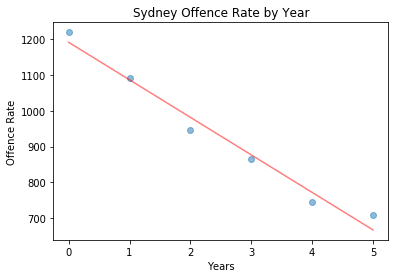

In [20]:
model = LinearRegression()
model.fit(x,y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.title('Sydney Offence Rate by Year')
plt.xlabel('Years')
plt.ylabel('Offence Rate')
print ("MSE:", mean_squared_error(y_hat, y).round(2))
print ("R^2:", r2_score(y_hat, y).round(2))

### Sexual Assault - Blacktown

In [21]:
blacktown_sex = crimeRateTS[(crimeRateTS['LGA'] == 'Blacktown') & (crimeRateTS['Offence category'] == 'Sexual offences')]
blacktown_sex

,LGA,Offence category,total,year,Code,population,offence_rate
78,Blacktown,Sexual offences,522,2013,10750,324797,16.072
1094,Blacktown,Sexual offences,583,2014,10750,331825,17.570
2110,Blacktown,Sexual offences,632,2015,10750,339449,18.618
3126,Blacktown,Sexual offences,576,2016,10750,348030,16.550
4142,Blacktown,Sexual offences,665,2017,10750,357839,18.584
5158,Blacktown,Sexual offences,684,2018,10750,366534,18.661


In [22]:
est = LinearRegression(fit_intercept = True)

x = np.array(yearNumber).reshape(6,1)
y = blacktown_sex.offence_rate

est.fit(x, y)

print ("Coefficients: ", est.coef_)
print ("Intercept: ", est.intercept_)

Coefficients:  [0.39768571]
Intercept:  16.681619047619048


MSE: 0.63
R^2: -0.36


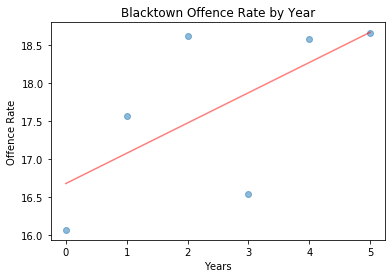

In [23]:
model = LinearRegression()
model.fit(x,y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.title('Blacktown Offence Rate by Year')
plt.xlabel('Years')
plt.ylabel('Offence Rate')
print ("MSE:", mean_squared_error(y_hat, y).round(2))
print ("R^2:", r2_score(y_hat, y).round(2))

### Sexual Assualt - Central Coast

In [24]:
sydney_sex = crimeRateTS[(crimeRateTS['LGA'] == 'Central Coast') & (crimeRateTS['Offence category'] == 'Sexual offences')]
sydney_sex

,LGA,Offence category,total,year,Code,population,offence_rate
206,Central Coast,Sexual offences,543,2013,11650,327745,16.568
1222,Central Coast,Sexual offences,600,2014,11650,330377,18.161
2238,Central Coast,Sexual offences,563,2015,11650,333264,16.894
3254,Central Coast,Sexual offences,696,2016,11650,336611,20.677
4270,Central Coast,Sexual offences,676,2017,11650,339394,19.918
5286,Central Coast,Sexual offences,695,2018,11650,342047,20.319


In [25]:
est = LinearRegression(fit_intercept = True)

x = np.array(yearNumber).reshape(6,1)
y = sydney_sex.offence_rate

est.fit(x, y)

print ("Coefficients: ", est.coef_)
print ("Intercept: ", est.intercept_)

Coefficients:  [0.79454286]
Intercept:  16.769809523809524


MSE: 0.84
R^2: 0.54


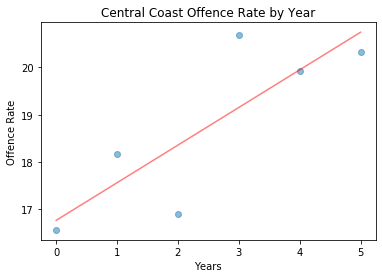

In [43]:
model = LinearRegression()
model.fit(x,y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.title('Central Coast Offence Rate by Year')
plt.xlabel('Years')
plt.ylabel('Offence Rate')
print ("MSE:", mean_squared_error(y_hat, y).round(2))
print ("R^2:", r2_score(y_hat, y).round(2))

### Results From Linear Regressions

Each linear regression was performed using the number of years passed as x variable and the offence rate being the predicted y variable, making this model a simple time-series model. From the outputs of these regressions it can be seen that for the theft and sexual offences cases within blacktown, the linear regressions do not work very well at all. This is because the r2 values are negative and they also have very high error values. For the theft cases within Sydney, the regression obtains a very high r2 almost being 1, with little mean squared error from the predicted values. The Central Coast for sexual offence cases also generated a positive r2 score of 0.54 which shows there is a fairly good relationship with a small amount of mean squared error.

Although two out of four of the above regressions produced outputs that show that the dependant variables can be explained well by the independant variable there are many other variables at play that can have a large influence on the offence rate. Factors such as unemployment and important events can largely effect the rate aswell. Therefore a simple model like linear regression would not be able to capture the various other factors which influence the offence rate.

## K-Means Clustering

Another technique is k-means clustering which finds groups within the data based on the variables being used for comparison, I will use the same two variables that were used for comparison within the simple linear regressions.

### Theft

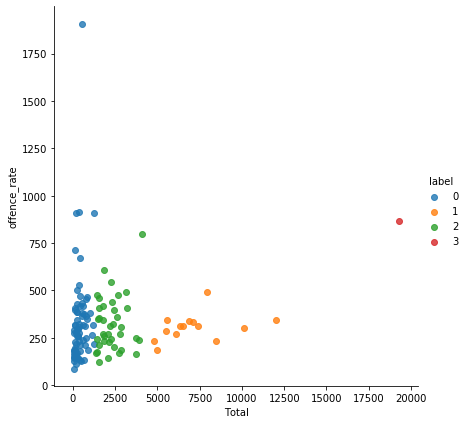

In [27]:
crime_theft2 = crime_theft[['Total', 'offence_rate']].copy()

kmeans = KMeans(n_clusters=4)
kmeans.fit(crime_theft2)
crime_theft2['label'] = kmeans.predict(crime_theft2)
_p = sns.lmplot("Total", "offence_rate", data=crime_theft2, fit_reg=False, hue='label', height=6)

In [28]:
crime_theft[ crime_theft2['label'] == 0][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
23,Ballina,47.1,42993,9.8,14.3,19.8,46.2,48108.0,5.2,11.0,22.2,47.4,28.7
31,Balranald,40.2,2330,12.1,16.6,18.4,38.5,42262.0,10.1,6.3,14.7,40.2,41.9
55,Bega Valley,50.3,33941,9.3,12.4,19.1,50.4,44685.0,4.4,11.6,21.6,41.9,35.0
63,Bellingen,48.1,12951,9.1,12.7,20.3,47.6,45694.0,5.0,11.8,18.2,47.4,32.9
71,Berrigan,48.3,8609,9.2,14.2,16.4,48.4,44545.0,3.5,7.7,17.7,44.1,36.5
87,Bland,41.8,6024,10.4,16.0,17.8,40.9,46626.0,5.2,4.8,15.7,45.6,36.8
95,Blayney,41.5,7343,11.0,15.9,20.3,38.4,54672.0,4.9,6.2,18.6,41.4,38.1
111,Bogan,40.0,2764,12.7,16.1,21.4,36.8,51762.0,17.9,4.5,14.2,45.0,39.4
119,Bourke,35.8,2762,11.0,19.5,21.3,31.7,50194.0,32.1,3.8,15.2,52.8,29.1
127,Brewarrina,32.5,1710,14.0,19.4,21.2,29.4,47323.0,61.3,2.1,11.0,61.3,25.3


In [29]:
crime_theft[ crime_theft2['label'] == 0][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median          42.878667
population       13940.480000
youth%              10.992000
young-adult%        16.048000
adult%              19.365333
senior%             40.937333
mean_income      52095.693333
oceania              9.812000
overseas_born        8.357333
office              18.120000
professionals       45.830667
trades              34.156000
dtype: float64

In [30]:
crime_theft[ crime_theft2['label'] == 1][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
79,Blacktown,33.3,348030,14.0,23.9,19.3,25.8,56407.0,8.4,40.4,25.6,38.5,33.9
175,Campbelltown,34.0,161566,14.4,22.2,18.7,29.1,53404.0,9.8,31.4,25.9,35.0,37.1
191,Canterbury-Bankstown,35.0,361862,13.7,22.8,18.9,30.3,51942.0,3.3,44.0,25.1,39.5,33.0
207,Central Coast,41.8,336611,11.9,17.0,19.5,39.4,54428.0,5.8,14.6,24.3,42.2,31.9
287,Cumberland,32.6,225691,14.1,27.7,17.4,25.9,49593.0,3.2,52.2,23.5,37.5,35.9
327,Fairfield,36.1,205675,15.1,20.1,19.8,32.3,48052.0,3.6,53.9,23.5,31.7,42.0
455,Inner West,36.4,191194,11.2,29.7,21.8,28.4,76842.0,3.9,34.2,20.1,62.5,15.9
519,Lake Macquarie,41.7,202332,12.1,17.2,19.3,39.1,57506.0,5.5,10.0,24.4,41.5,32.7
559,Liverpool,33.4,211983,14.7,22.3,20.1,26.4,55082.0,7.1,40.7,25.3,37.0,35.4
679,Newcastle,36.5,160707,14.9,22.2,19.0,32.8,58859.0,4.8,13.9,22.3,49.5,26.7


In [31]:
crime_theft[ crime_theft2['label'] == 1][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           36.250000
population       236968.142857
youth%               13.407143
young-adult%         22.600000
adult%               19.500000
senior%              31.035714
mean_income       58571.714286
oceania               5.192857
overseas_born        32.621429
office               24.028571
professionals        43.264286
trades               30.735714
dtype: float64

In [32]:
crime_theft[ crime_theft2['label'] == 3][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
847,Sydney,32.1,222717,18.1,42.1,16.8,20.9,68007.0,4.2,47.7,18.7,64.9,14.5


In [33]:
crime_theft[ crime_theft2['label'] == 3][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           32.1
population       222717.0
youth%               18.1
young-adult%         42.1
adult%               16.8
senior%              20.9
mean_income       68007.0
oceania               4.2
overseas_born        47.7
office               18.7
professionals        64.9
trades               14.5
dtype: float64

Looking at the clusters created by the k-means process with 4 clusters, we can see the different areas residing within each cluster and what numbers are within each variable. Label 2 only consists of Sydney.

Label 0 consists of areas with middle size populations, middle age median and more of an even spread between the distribution of age groups. Average income is also relatively high. Total theft cases average around 2500 as seen on the graph.

Label 1 consists of younger average age medians, very high populations and a higher distribution of age groups within the youth and young adult groups. Average income is also relatively high. Total theft cases varies between 5000 and 12500 as seen in the graph.

Label 3 consists of a higher average age median, small population sizes and a higher distribution of age groups within the senior group. Total theft cases are very low.

### Sexual Offences

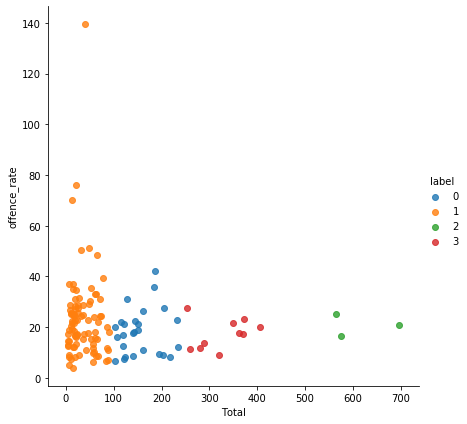

In [34]:
crime_sex2 = crime_sex[['Total', 'offence_rate']].copy()

kmeans = KMeans(n_clusters=4)
kmeans.fit(crime_sex2)
crime_sex2['label'] = kmeans.predict(crime_sex2)
_p = sns.lmplot("Total", "offence_rate", data=crime_sex2, fit_reg=False, hue='label', height=6)

In [35]:
crime_sex[ crime_sex2['label'] == 0][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
6,Albury,38.3,52171,13.7,19.2,18.6,35.3,50857.0,4.0,10.8,24.0,42.9,31.6
46,Bayside,35.3,164534,13.2,27.9,18.8,29.6,59992.0,3.6,46.0,25.0,44.8,28.1
102,Blue Mountains,43.5,78835,11.2,15.4,21.0,40.6,60466.0,4.1,16.8,20.9,53.3,24.6
222,Cessnock,37.4,56720,12.8,19.1,18.8,34.1,55219.0,8.3,6.3,21.3,32.1,45.0
230,Clarence Valley,48.2,51622,10.2,13.3,18.8,48.0,45451.0,7.6,7.5,22.9,40.9,34.4
246,Coffs Harbour,43.1,74670,11.3,16.2,19.1,41.1,46577.0,6.7,13.9,23.8,43.1,31.4
294,Dubbo Regional,36.7,51404,12.9,19.5,18.5,34.1,51183.0,16.5,7.2,23.7,43.2,31.4
326,Fairfield,36.1,205675,15.1,20.1,19.8,32.3,48052.0,3.6,53.9,23.5,31.7,42.0
350,Georges River,36.4,153161,14.0,23.7,19.2,32.6,59090.0,2.8,45.5,25.7,47.4,24.9
414,Hawkesbury,37.2,66346,14.2,18.7,21.3,32.6,57800.0,5.2,12.3,23.9,37.7,36.6


In [36]:
crime_sex[ crime_sex2['label'] == 0][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           39.700000
population       107849.884615
youth%               12.561538
young-adult%         19.061538
adult%               19.657692
senior%              36.261538
mean_income       57772.653846
oceania               5.761538
overseas_born        20.123077
office               23.273077
professionals        45.103846
trades               29.973077
dtype: float64

In [37]:
crime_sex[ crime_sex2['label'] == 1][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
14,Armidale Regional,35.6,30313,18.7,17.3,17.7,34.5,47386.0,8.8,12.3,22.1,49.5,27.0
22,Ballina,47.1,42993,9.8,14.3,19.8,46.2,48108.0,5.2,11.0,22.2,47.4,28.7
30,Balranald,40.2,2330,12.1,16.6,18.4,38.5,42262.0,10.1,6.3,14.7,40.2,41.9
38,Bathurst Regional,36.4,42244,15.3,18.5,18.7,33.4,54554.0,6.7,8.6,21.8,44.4,32.3
54,Bega Valley,50.3,33941,9.3,12.4,19.1,50.4,44685.0,4.4,11.6,21.6,41.9,35.0
62,Bellingen,48.1,12951,9.1,12.7,20.3,47.6,45694.0,5.0,11.8,18.2,47.4,32.9
70,Berrigan,48.3,8609,9.2,14.2,16.4,48.4,44545.0,3.5,7.7,17.7,44.1,36.5
86,Bland,41.8,6024,10.4,16.0,17.8,40.9,46626.0,5.2,4.8,15.7,45.6,36.8
94,Blayney,41.5,7343,11.0,15.9,20.3,38.4,54672.0,4.9,6.2,18.6,41.4,38.1
110,Bogan,40.0,2764,12.7,16.1,21.4,36.8,51762.0,17.9,4.5,14.2,45.0,39.4


In [38]:
crime_sex[ crime_sex2['label'] == 1][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median          41.987640
population       21999.033708
youth%              11.316854
young-adult%        17.242697
adult%              19.425843
senior%             39.571910
mean_income      54544.325843
oceania              8.975281
overseas_born       12.010112
office              18.777528
professionals       47.186517
trades              32.134831
dtype: float64

In [39]:
crime_sex[ crime_sex2['label'] == 2][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
78,Blacktown,33.3,348030,14.0,23.9,19.3,25.8,56407.0,8.4,40.4,25.6,38.5,33.9
206,Central Coast,41.8,336611,11.9,17.0,19.5,39.4,54428.0,5.8,14.6,24.3,42.2,31.9
846,Sydney,32.1,222717,18.1,42.1,16.8,20.9,68007.0,4.2,47.7,18.7,64.9,14.5


In [40]:
crime_sex[ crime_sex2['label'] == 2][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           35.733333
population       302452.666667
youth%               14.666667
young-adult%         27.666667
adult%               18.533333
senior%              28.700000
mean_income       59614.000000
oceania               6.133333
overseas_born        34.233333
office               22.866667
professionals        48.533333
trades               26.766667
dtype: float64

In [41]:
crime_sex[ crime_sex2['label'] == 3][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].head(10)

,LGA,age_median,population,youth%,young-adult%,adult%,senior%,mean_income,oceania,overseas_born,office,professionals,trades
174,Campbelltown,34.0,161566,14.4,22.2,18.7,29.1,53404.0,9.8,31.4,25.9,35.0,37.1
190,Canterbury-Bankstown,35.0,361862,13.7,22.8,18.9,30.3,51942.0,3.3,44.0,25.1,39.5,33.0
286,Cumberland,32.6,225691,14.1,27.7,17.4,25.9,49593.0,3.2,52.2,23.5,37.5,35.9
518,Lake Macquarie,41.7,202332,12.1,17.2,19.3,39.1,57506.0,5.5,10.0,24.4,41.5,32.7
558,Liverpool,33.4,211983,14.7,22.3,20.1,26.4,55082.0,7.1,40.7,25.3,37.0,35.4
590,Mid-Coast,51.3,91801,9.5,12.0,17.7,51.5,45338.0,7.4,9.3,22.8,41.0,34.5
678,Newcastle,36.5,160707,14.9,22.2,19.0,32.8,58859.0,4.8,13.9,22.3,49.5,26.7
726,Parramatta,34.5,234444,12.0,29.4,18.5,27.3,60990.0,3.0,49.5,23.8,52.7,21.6
734,Penrith,34.0,201597,14.2,23.0,19.1,28.2,57287.0,7.1,21.6,27.4,35.4,35.3
1006,Wollongong,38.3,210394,14.5,19.4,19.3,35.1,59856.0,3.9,21.5,22.6,46.1,29.8


In [42]:
crime_sex[ crime_sex2['label'] == 3][['LGA','age_median', 'population', 'youth%', 'young-adult%', 'adult%', 'senior%', 
'mean_income', 'oceania', 'overseas_born', 'office', 'professionals', 'trades']].mean()

age_median           37.13
population       206237.70
youth%               13.41
young-adult%         21.82
adult%               18.80
senior%              32.57
mean_income       54985.70
oceania               5.51
overseas_born        29.41
office               24.31
professionals        41.52
trades               32.20
dtype: float64

Again using a k-mean clustering process with 4, we can see the different areas residing within each cluster and what numbers are within each variable.

Label 0 is made up of LGA's with high populations, lower average age median and a higher distribution of people within the young-adult group. Total cases ranging between 250-400.

Label 1 has a low average population size, high average median age and also having a high distribution of people within the senior group. Total cases ranging between 0-100.

Label 2 has medium sized average population, high average median age and a high distribution of people within the senior group. Total cases ranging between 100-200.

Label 3 is made up of the outliers, not many similarities between the areas other than population size.

### Findings From K-means

The K-means process worked well for this data-set as it grouped areas with similar characteristics together which helped to understand the main variables that effect the amount of cases within each region. The results prove to be better than what was produced from the linear regressions.